# Why Jupyter Notebook ?

As most of the evaluation of model preformance will require human juding, It's better to experiment in Jupyter Notebook for now.

Of course metrics will be put into account, but I noticed with the inital experiment that the model generates white pixels "Background was white" everywhere so it decreases the loss. basically the model learnt to generate the background not the required task. it found it easier that way to decrease the loss :D

In [1]:
import tensorflow as tf
from Utils.model_builder.tf_models import model_01
module_name = "model_01"
from Utils.mlflow.mlflow import mlflow_track
from Utils.data_loader.load_images import load_x_y_images, load_x_images, load_test_image
import mlflow


2022-09-30 10:43:11.629748: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-30 10:43:12.006527: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-30 10:43:13.746447: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvrtc.so.11.1: cannot open shared object file: No such file or directory
2022-09-30 10:43:13.747816: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvrtc.so.11.1: cannot open shared object file: No such file or direc

In [2]:
from Utils.config import load_config_file
config_file = load_config_file()

In [3]:
track_uri = config_file["mlflow"]["track_uri"]
data_version = config_file["data_versions"][-1] # -1 to get the latest only without having to hardcode it in here,
                                                # "Assuming that the last will always will be the updated one"
epochs = config_file["train_config"]["epochs"]


In [4]:
metric = config_file["train_config"]["metric"]
reduce_lr_pt = config_file["train_config"]["lr_reduce_pati"]
erl_stp_pt = config_file["train_config"]["earl_stop"]

In [5]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
callbacks = []
callbacks.append(EarlyStopping(monitor=metric,patience=erl_stp_pt,
                verbose=1,restore_best_weights=True))
callbacks.append(ReduceLROnPlateau(monitor=metric,
                patience=reduce_lr_pt,verbose=1))

In [6]:
mlflow.set_tracking_uri(track_uri)
mlflow.set_experiment("X_X_images")

<Experiment: artifact_location='./mlruns/1', creation_time=1664522651911, experiment_id='1', last_update_time=1664522651911, lifecycle_stage='active', name='X_X_images', tags={}>

In [7]:
'''from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from hyperopt.pyll import scope'''

'from hyperopt import fmin, tpe, hp, STATUS_OK, Trials\nfrom hyperopt.pyll import scope'

In [8]:
dataset = load_x_images(data_version)

Found 19 files belonging to 1 classes.


2022-09-30 10:43:17.117793: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-30 10:43:17.130469: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-30 10:43:17.130937: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-30 10:43:17.132375: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Found 11 files belonging to 1 classes.
Found 71 files belonging to 1 classes.


In [11]:
@mlflow_track
def exp_x_x_images(epochs=epochs,dataset=dataset,data_version=data_version):
    """I would like to try generating the same images so that the model can learn the feature of our dataset,
    then leverage this learning with our task"""
    mlflow.tensorflow.autolog()
    mlflow.log_param("Data Version", data_version)
    mlflow.log_param("Epochs", epochs)
    mlflow.log_param("reduce_lr", reduce_lr_pt)
    mlflow.log_param("earl_st",erl_stp_pt)

    lr = 0.001
    loss = config_file["train_config"]["loss"]
    metric = config_file["train_config"]["metric"]
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model = model_01.model(loss_func=loss, optimizer=optimizer, metrics=metric).get_model()
    mlflow.log_param("Model Module", module_name)
    history = model.fit(dataset,epochs=epochs,callbacks=callbacks)
    mae = model.evaluate(dataset)
    #mlflow.log_metric("mae", mae)
    
    return model

In [12]:
model = exp_x_x_images(epochs=50)

Epoch 1/50
10/10 [==============================] - 8s 698ms/step - loss: 0.2269 - mae: 0.4330 - lr: 0.0010
Epoch 2/50
10/10 [==============================] - 7s 621ms/step - loss: 0.0777 - mae: 0.2259 - lr: 0.0010
Epoch 3/50
10/10 [==============================] - 6s 615ms/step - loss: 0.0393 - mae: 0.1567 - lr: 0.0010
Epoch 4/50
10/10 [==============================] - 6s 626ms/step - loss: 0.0274 - mae: 0.1186 - lr: 0.0010
Epoch 5/50
10/10 [==============================] - 7s 686ms/step - loss: 0.0205 - mae: 0.0973 - lr: 0.0010
Epoch 6/50
10/10 [==============================] - 9s 831ms/step - loss: 0.0183 - mae: 0.0917 - lr: 0.0010
Epoch 7/50
10/10 [==============================] - 9s 871ms/step - loss: 0.0172 - mae: 0.0850 - lr: 0.0010
Epoch 8/50
10/10 [==============================] - 9s 895ms/step - loss: 0.0167 - mae: 0.0832 - lr: 0.0010
Epoch 9/50
10/10 [==============================] - 10s 948ms/step - loss: 0.0165 - mae: 0.0831 - lr: 0.0010
Epoch 10/50
10/10 [========

INFO:tensorflow:Assets written to: /tmp/tmpfqyb2jwa/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpfqyb2jwa/model/data/model/assets


10/10 [==============================] - 7s 651ms/step - loss: 0.0144 - mae: 0.0761


In [13]:
'''space = {
            'learning_rate': hp.loguniform('learning_rate', -10, 0) #4.5e-5 to 1.0
        }

best_result = fmin(
    fn=exp_x_x_images,
    space=space,
    algo=tpe.suggest,
    max_evals=50,
    trials=Trials()
)'''

"space = {\n            'learning_rate': hp.loguniform('learning_rate', -10, 0) #4.5e-5 to 1.0\n        }\n\nbest_result = fmin(\n    fn=exp_x_x_images,\n    space=space,\n    algo=tpe.suggest,\n    max_evals=50,\n    trials=Trials()\n)"

In [15]:
test_image = load_test_image("Data/4-09-22/test/WhatsApp Image 2022-09-24 at 4.44.56 PM (1).jpeg",(344,344))

In [16]:
from Utils.visualize_images.visualize_images import display_one_image

Mlflow doesn't allow to retrieve model or any object from the experiment, so we will have to retrieve our model from mlflow model registry

In [19]:
run_id = "32f1f8a1133e4fc6989e9b54b17bc7f0"
model = mlflow.pyfunc.load_model(f"./mlruns/1/{run_id}/artifacts/model")

/home/akm/Combiner-GANS/lib/python3.8/site-packages/keras/backend.py:451: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


1/1 [==============================] - 0s 25ms/step


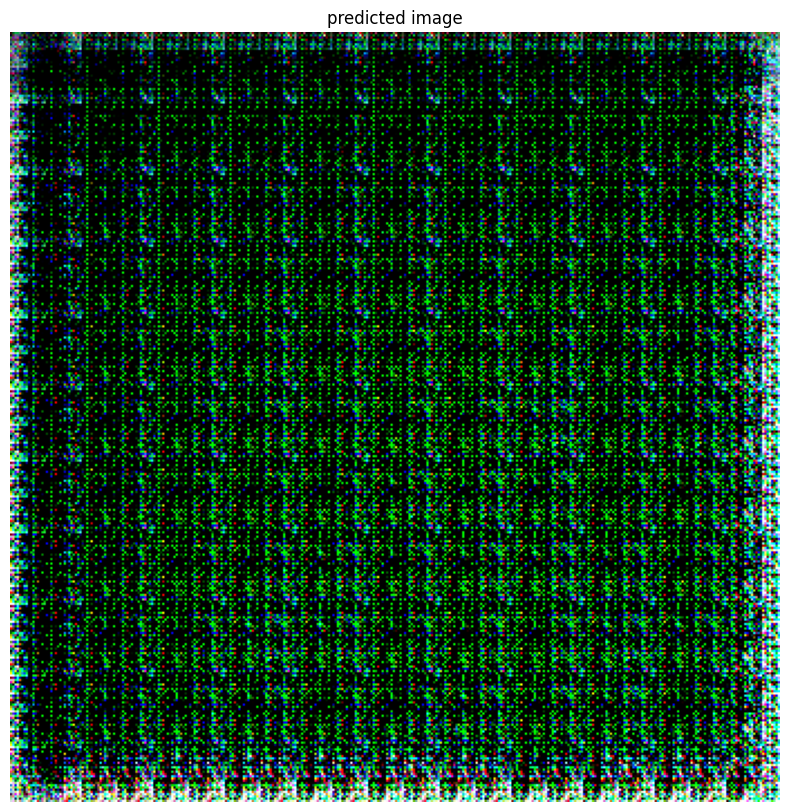

In [30]:
pred_image = model.predict(test_image)
display_one_image(pred_image)

In [31]:
mlflow.set_experiment("X_Y_images")

2022/09/30 11:15:00 INFO mlflow.tracking.fluent: Experiment with name 'X_Y_images' does not exist. Creating a new experiment.


<Experiment: artifact_location='./mlruns/2', creation_time=1664529300739, experiment_id='2', last_update_time=1664529300739, lifecycle_stage='active', name='X_Y_images', tags={}>

In [32]:
dataset = load_x_y_images(data_version)

Found 19 files belonging to 1 classes.
Found 1 files belonging to 1 classes.
Found 11 files belonging to 1 classes.
Found 1 files belonging to 1 classes.
Found 71 files belonging to 1 classes.
Found 1 files belonging to 1 classes.


Because mlflow doesn't allow to retrieve the model as tensorflow mode "Can't freeze layers", so we have to retrieve it by using tensorflow

In [43]:
model = tf.keras.models.load_model(f"mlruns/1/{run_id}/artifacts/model/data/model")

In [44]:
@mlflow_track
def exp_x_y_images(model,dataset=dataset,data_version=data_version):
    """I would like to try generating the same images so that the model can learn the feature of our dataset,
    then leverage this learning with our task"""
    mlflow.tensorflow.autolog()
    mlflow.log_param("Data Version", data_version)
    mlflow.log_param("Epochs", epochs)
    mlflow.log_param("reduce_lr", reduce_lr_pt)
    mlflow.log_param("earl_st",erl_stp_pt)

    lr = 0.001 
    loss = config_file["train_config"]["loss"]
    metric = config_file["train_config"]["metric"]
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

    model = model
    for layer in model.layers[:-1]:
        layer.trainable = False
    mlflow.log_param("Model Module", f"{module_name},lyr_freezed_-1")
    history = model.fit(dataset,epochs=epochs,callbacks=callbacks)
    #mse = model.evalute(dataset)
    #mlflow.log_metric("mse", mse)
    #return model

In [45]:
exp_x_y_images(model)

Epoch 1/500
 6/10 [=================>............] - ETA: 2s - loss: 0.0235 - mae: 0.1177WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.2810s vs `on_train_batch_end` time: 0.3195s). Check your callbacks.


10/10 [==============================] - 8s 629ms/step - loss: 0.0149 - mae: 0.0846 - lr: 1.0000e-04
Epoch 2/500
10/10 [==============================] - 6s 632ms/step - loss: 0.0131 - mae: 0.0699 - lr: 1.0000e-04
Epoch 3/500
10/10 [==============================] - 6s 630ms/step - loss: 0.0125 - mae: 0.0678 - lr: 1.0000e-04
Epoch 4/500
10/10 [==============================] - 6s 628ms/step - loss: 0.0123 - mae: 0.0676 - lr: 1.0000e-04
Epoch 5/500
10/10 [==============================] - 6s 628ms/step - loss: 0.0123 - mae: 0.0675 - lr: 1.0000e-04
Epoch 6/500
10/10 [==============================] - 6s 618ms/step - loss: 0.0121 - mae: 0.0675 - lr: 1.0000e-04
Epoch 7/500
10/10 [==============================] - 6s 635ms/step - loss: 0.0120 - mae: 0.0670 - lr: 1.0000e-04
Epoch 8/500
10/10 [==============================] - 6s 629ms/step - loss: 0.0119 - mae: 0.0675 - lr: 1.0000e-04
Epoch 9/500
10/10 [==============================] - 6s 619ms/step - loss: 0.0119 - mae: 0.0675 - lr: 1.0000

INFO:tensorflow:Assets written to: /tmp/tmplf_qh5fb/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmplf_qh5fb/model/data/model/assets


In [48]:
run_id = "970f3cfb98e94267a741a25c77ae71e0"
model = tf.keras.models.load_model(f"mlruns/2/{run_id}/artifacts/model/data/model")

1/1 [==============================] - 0s 155ms/step


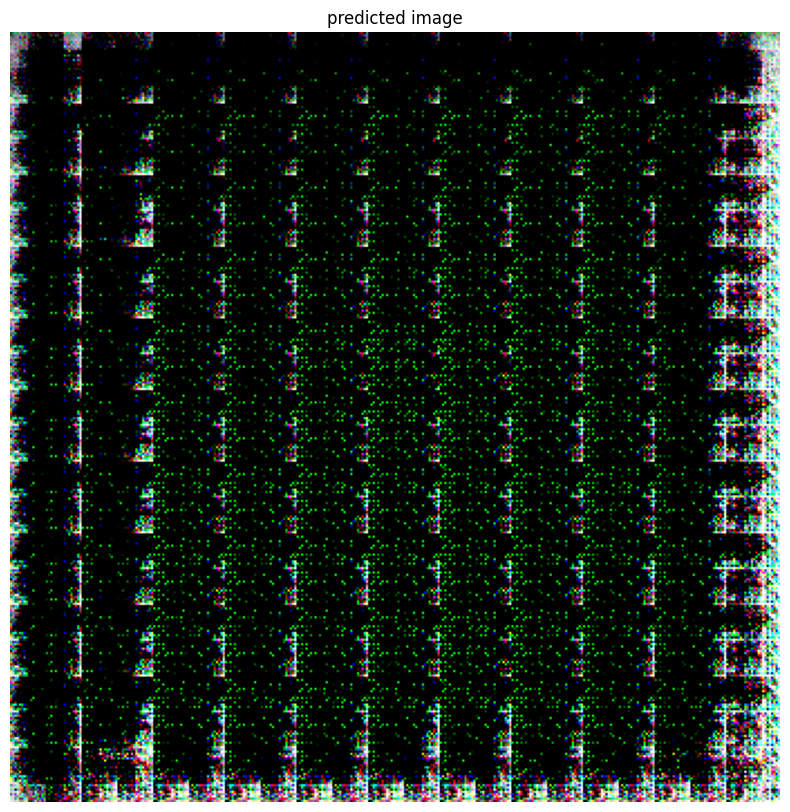

In [49]:
pred_image = model.predict(test_image)
display_one_image(pred_image)